# Python import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from sklearn.model_selection import StratifiedKFold
from keras import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

# Load Data

In [2]:
train = pd.read_csv('/kaggle/input/dacon-com-vision/train.csv')
test = pd.read_csv('/kaggle/input/dacon-com-vision/test.csv')
sub = pd.read_csv('/kaggle/input/dacon-com-vision/submission.csv')

# Data Preprocessing & EDA

In [3]:
display(train,test,sub)

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


,id,digit
0,2049,0
1,2050,0
2,2051,0
3,2052,0
4,2053,0
...,...,...
20475,22524,0
20476,22525,0
20477,22526,0
20478,22527,0


In [4]:
#distribution of label('digit') 
train['digit'].value_counts()

2    233
5    225
6    212
4    207
3    205
1    202
9    197
7    194
0    191
8    182
Name: digit, dtype: int64

In [5]:
# drop columns
train2 = train.drop(['id','digit','letter'],1)
test2 = test.drop(['id','letter'],1)

In [6]:
# convert pandas dataframe to numpy array
train2 = train2.values
test2 = test2.values

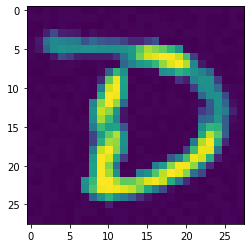

In [7]:
plt.imshow(train2[100].reshape(28,28))

In [8]:
# reshape
train2 = train2.reshape(-1,28,28,1)
test2 = test2.reshape(-1,28,28,1)

In [9]:
# data normalization
train2 = train2/255.0
test2 = test2/255.0

In [10]:
# ImageDatagenerator & data augmentation
idg = ImageDataGenerator(height_shift_range=(-1,1),width_shift_range=(-1,1))
idg2 = ImageDataGenerator()

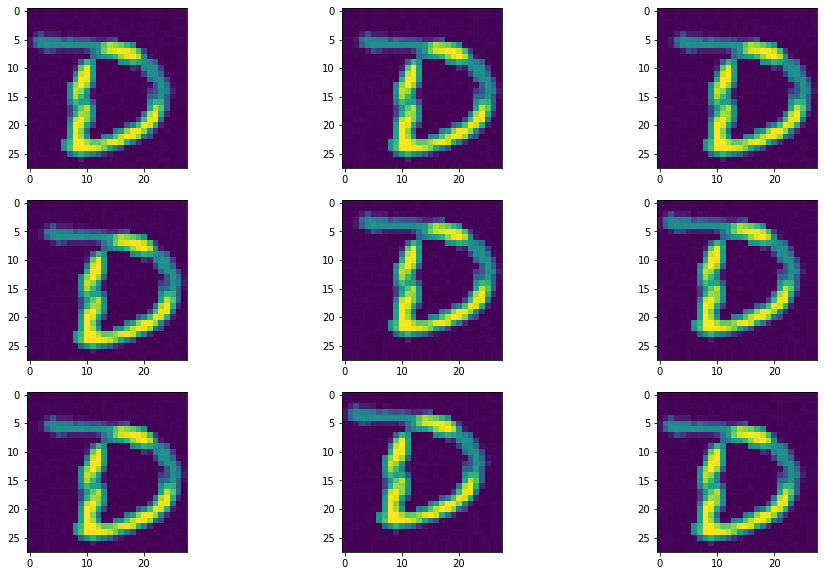

In [11]:
# show augmented image data
sample_data = train2[100].copy()
sample = expand_dims(sample_data,0)
sample_datagen = ImageDataGenerator(height_shift_range=(-1,1), width_shift_range=(-1,1))
sample_generator = sample_datagen.flow(sample, batch_size=1)

plt.figure(figsize=(16,10))

for i in range(9) : 
    plt.subplot(3,3,i+1)
    sample_batch = sample_generator.next()
    sample_image=sample_batch[0]
    plt.imshow(sample_image.reshape(28,28))

# Validation

In [12]:
# cross validation
skf = StratifiedKFold(n_splits=40, random_state=42, shuffle=True)

# Modeling

In [ ]:
%%time

reLR = ReduceLROnPlateau(patience=100,verbose=1,factor=0.5) #learning rate scheduler
es = EarlyStopping(patience=160, verbose=1)

val_loss_min = []
result = 0
nth = 0

for train_index, valid_index in skf.split(train2,train['digit']) :
    
    mc = ModelCheckpoint('best_cvision.h5',save_best_only=True, verbose=1)
    
    x_train = train2[train_index]
    x_valid = train2[valid_index]    
    y_train = train['digit'][train_index]
    y_valid = train['digit'][valid_index]
    
    train_generator = idg.flow(x_train,y_train,batch_size=8)
    valid_generator = idg2.flow(x_valid,y_valid)
    test_generator = idg2.flow(test2,shuffle=False)
    
    model = Sequential()
    
    model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same')) 
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(5,5),activation='relu',padding='same')) 
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())

    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(10,activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.002,epsilon=None),metrics=['acc'])
    
    learning_history = model.fit_generator(train_generator,epochs=2000, validation_data=valid_generator, callbacks=[es,mc,reLR])
    
    # predict
    model.load_weights('best_cvision.h5')
    result += model.predict_generator(test_generator,verbose=True)/40
    
    # save val_loss
    hist = pd.DataFrame(learning_history.history)
    val_loss_min.append(hist['val_loss'].min())
    
    nth += 1
    print(nth, '번째 학습을 완료했습니다.')

In [ ]:
display(val_loss_min, np.mean(val_loss_min))

In [ ]:
model.summary()

# Submission

In [ ]:
sub['digit'] = result.argmax(1)

In [ ]:
sub

In [ ]:
sub.to_csv('Dacon_cvision_0914_40_epsNone.csv',index=False)